In [1]:
%matplotlib inline
from brian2 import *

### [Exercise: Variable delays]

* What happens if the delay is not the same for all connections? Is the stimulation as effective?
* Is there another way to get the same effect for fixed delays (and keeping the constant firing rate across input neurons)?

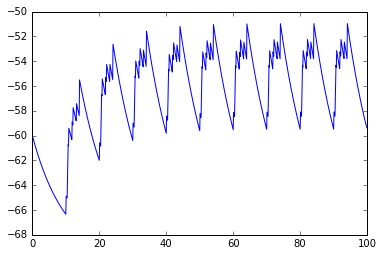

In [2]:
# Variable delays
start_scope()
eqs = 'dx/dt = 100*Hz : 1'
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')

input_mon = StateMonitor(input_group, 'x', record=True)

tau = 10*ms   # time constant
R = 50*Mohm   # membrane resistance
E_L = -70*mV  # leak reversal potential

eqs = '''
dV_m/dt = (E_L - V_m)/tau : volt (unless refractory)
'''

neurons = NeuronGroup(10, eqs, threshold='V_m>-50*mV',
                     reset='V_m=-60*mV',
                     refractory=5*ms)
neurons.V_m = -60*mV

connections = Synapses(input_group, neurons, pre='V_m_post += 1.5*mV')
connections.connect(True)
# Random delay, from a uniform distribution between 0 and 5ms for each synapse
# (rand() draws a new random number between 0 and 1 for each cell)
connections.delay = 'rand()*5*ms'  

mon = StateMonitor(neurons, 'V_m', record=True)

run(100*ms)
plot(mon.t/ms, mon.V_m[0]/mV)

The input is now less effective, because all the inputs do no longer arrive at the same time

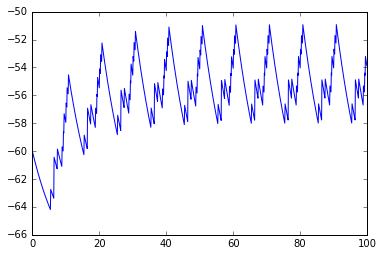

In [3]:
# Alternative solution: non-synchronous input spikes
start_scope()
eqs = 'dx/dt = 100*Hz : 1'
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')
# Making the initial state of the input neurons random means that
# they no longer spike all at the same time
input_group.x = 'rand()'

input_mon = StateMonitor(input_group, 'x', record=True)

tau = 10*ms   # time constant
R = 50*Mohm   # membrane resistance
E_L = -70*mV  # leak reversal potential

eqs = '''
dV_m/dt = (E_L - V_m)/tau : volt (unless refractory)
'''

neurons = NeuronGroup(10, eqs, threshold='V_m>-50*mV',
                     reset='V_m=-60*mV',
                     refractory=5*ms)
neurons.V_m = -60*mV

connections = Synapses(input_group, neurons, pre='V_m_post += 1.5*mV')
connections.connect(True)
# Constant delay, but now the input neurons no longer spike at the same time
# (see above)
connections.delay = 5*ms

mon = StateMonitor(neurons, 'V_m', record=True)

run(100*ms)
plot(mon.t/ms, mon.V_m[0]/mV)